# Language Background Classification

## Objectives

- preprocess text derived from HTML documents
- extract corpus linguistic features
- Built a supervised classification system to identify language background of English language learners

## Introduction

This is an end-to-end classification system using a corpus of HTML documents scraped from the [Lang-8 language learning website](https://lang-8.com/). In particular, it is a classifier to distinguish English text written by Lang-8 users whose native language (L1) is another European language (French and Spanish) from those written by L1 speakers of East Asian languages (Japanese, Korean, and Mandarin Chinese). 

## Part 1: Text extraction from HTML

Three things to be extracted from the HTML files inside the ZIP file:
- the native language of the writer
- the raw text (string) of the entry, with HTML removed
- the original filename (so that you can use our provided train/dev/test split) 

In [1]:
import os
from bs4 import BeautifulSoup
import pandas as pd
from zipfile import ZipFile

In [2]:
my_zip = ZipFile("data/raw/lang-8.zip")
file_names = my_zip.namelist()[1:]

In [3]:
def get_L1(html):
    '''Extract the native language from the html string'''
    for language in html.find_all(title='Native language'):
        native_language = language.text
        return native_language
    
def get_text(html):
    '''Extract the entry text from the html string'''
    # "div" shoud have "id" with "body_show_ori"
    sent = []
    for text in html.find_all(id='body_show_ori'):
        for node in text:
            if node in text.find_all('br'):
                sent.append('\n')
            else:
                sent.append(node.text)

    text_message = ''.join(sent)
    return text_message

def get_filename_in_txt(html):
    '''Extract the filename from the html string'''
    for title in html.find_all("title"):
        file_name = title.text.split('|')[0].strip()
        return file_name
        
def get_author_name(html):
    '''Return a string as the author of the text'''
    for box in html.find_all(id = "author_box"):
        for names in box.find_all('a', {"class": "user_name"}):
            user_name = names.text
            return user_name

def get_generator(file_list):
    '''Return a dataframe of all extracted information'''
    for i in file_list:
        file_title = i.split('/')[1]
        f = my_zip.open(i)
        text_file = f.read()
        soup = BeautifulSoup(text_file)
        file_name = get_filename_in_txt(soup)
        native_lang = get_L1(soup)
        author_name = get_author_name(soup)
        text_mess = get_text(soup)
        f.close()
        final_output = {'filetitle': file_title,
         'filename': file_name,
         'text': text_mess,
         'language': native_lang,
         'author': author_name
        }
        yield final_output

In [4]:
results = get_generator(file_names)

In [5]:
next(results)

{'filetitle': '100060.html',
 'filename': 'In it days of pascuas, we are celebrated',
 'text': '\nIn it days of pascuas, we are celebrated :\n \nThe December 21 that is the day of the Spirit of the Christmas, where the angel Gabriel celebrates the arrival to Maria. We celebrate it with it has dinner from friends and family, in this 21 desires are asked for the prime year and one writes a leaf bad what of the year that then burns to eliminate it of our lives.\n\nDecember 24 is the day that god celebrates the Christmas or the birth in of the child; in the mangers the figure of the child is placed after 12 of the night as sign of birth. \n\nDecember 28 is the Day of the Santos Inocentes, where jokes all are played, this date according to the Catholic Church is one pagan - religious celebrates since masses and festivals realize in commemoration of millions of children salted and dried 2009 years ago with the birth of the Messiah.\n\nDecember 31 is the typical festivity with the fireworks, 

In [6]:
# function tests
file_name_1 = 'lang-8/167307.html'
file_name_2 = 'lang-8/259663.html'

test_text = """
I go to the library and I read the many book.

Originally I rarely read the book, but I will read the book 

in this vacation.

This vacation is my last vacation, 

so I don't want to regret to this vacation's lazy behaviors

And I go to nursery school for volunteer in 6p.m.

They are very very very cute.  <--Is this correct??:)

Anyway This site is good because I met good friend yesterday.

She is very kind, so I am impressive. 

Thanks. Have a good day.


"""

test_text_2 = """
If I had a time machine, I would travel to the past and try to see how the culture began, how the humans were created. Also I would like to visit the ancient civilizations like the Aztecs, Mayas and Chinese. 

Bye
"""

In [7]:
f = my_zip.open(file_name_1)
text_file = f.read()
soup = BeautifulSoup(text_file)
f.close()
assert get_L1(soup) == 'Korean'

assert get_text(soup) == test_text

assert get_author_name(soup) == 'oldergoku'

assert get_filename_in_txt(soup) == """Today's planning"""

print('success!')

success!


In [8]:
f = my_zip.open(file_name_2)
text_file = f.read()
soup = BeautifulSoup(text_file)
f.close()
assert get_L1(soup) == 'Spanish'

assert get_text(soup) == test_text_2

assert get_author_name(soup) == 'armacora'

assert get_filename_in_txt(soup) == 'A ride in the time machine'

print('success!')


success!


In [9]:
file_extraction_1 = {'filetitle': '105992.html',
 'filename': 'Let me introduce myself',
 'text': "\nHi!  My name is Alex (Sasha in Russian) and I'm from Belarus.\nI emigrated to the United states almost five years ago and I live in Brooklyn, NY.\nUnfortunately I have no one to speak with and have no abilities to practice my English. This is very sad - to live in English speaking country and\xa0have no way to speak and learn language that is all around you. :(\nWhen I first came to the United States I didn't know a single word in English.  I remember standing in the McDonalds the first day I came trying to order a French-fries and diet coke - I opened the mouth and... nothing came from it. I was standing and mumbling something. that was horrible.\nSo, I watched TV and read books - this is the way I learned English.\nFrom now on I will write here some thoughts about everything what bothers me. About emigration and cultural differences, about feelings, about America and my view on it.\n\nCan you please help me to correct my mistakes? Not only grammatical flaws but also the way I speak. Cause the language is not only the words and grammar rules, it is also THE WAY you speak, the way you express your thoughts.  Many people speaking foreign language often speak\xa0it in a very strange way - the way that natives never speak. Because different languages have different structures and different 'language tools' to express same things.  I hope you understand what I'm talking about.\n\nThank you.\n",
 'language': 'Russian',
 'author': 'Sampler'}

file_extraction_2 = {'filetitle': '248228.html',
 'filename': 'Hello',
 'text': "\nHello everyone, mi name is Fidel i'm new here, i hope you help me with the enclish i'll help you with the spanish. Thanks\n",
 'language': 'Spanish',
 'author': 'Fidelzch'}

In [10]:
assert next(get_generator(['lang-8/105992.html'])) == file_extraction_1
assert next(get_generator(['lang-8/248228.html'])) == file_extraction_2
print('success!')

success!


## Part 2: Feature Extraction

#### 1. imports

In [11]:
import nltk
import sys
from collections import defaultdict
from nltk import sent_tokenize
from nltk import word_tokenize
# !{sys.executable} -m install spacy
# !{sys.executable} -m spacy download en_core_web_sm
import re
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd

#### 2. data splitting

In [12]:
# create list of file dict for data spliting

file_names = ["data/data-split/train.txt", "data/data-split/test.txt", "data/data-split/dev.txt"]
file_sets = defaultdict(set)
def get_file_set(file_name):
    '''Create list of file dict for data spliting'''
    with open(file_name) as f:
        files = f.readlines()
    file_set = set()
    for file in files:
        file_set.add(file.strip("\n"))
    file_sets[file_name] = file_set
    return file_sets

for file_name in file_names:
    filename_dict = get_file_set(file_name)

In [13]:
# Data splitting

train_list = []
test_list = []
dev_list = []
for result in results:
    if result['language'] != 'Russian':
        if result['filetitle'] in filename_dict['data/data-split/train.txt']:
            train_list.append(result)
        elif result['filetitle'] in filename_dict['data/data-split/test.txt']:
            test_list.append(result)
        elif result['filetitle'] in filename_dict['data/data-split/dev.txt']:
            dev_list.append(result)

assert len(train_list) == 742
assert len(test_list) == 252
assert len(dev_list) == 246
print("success!")

success!


In [14]:
# Transform the target "language" into European or Asian
def get_target(list_of_dict):
    '''transform all the "language" into European or Asian'''
    for dictionary in list_of_dict:
        language = dictionary['language']
        if language in ['Spanish', 'French']:
            dictionary['language'] = language.replace(language, 'European')
        elif language in ['Japanese', 'Korean', 'Mandarin']:
            dictionary['language'] = language.replace(language, 'Asian')
    return list_of_dict

train_list = get_target(train_list)
test_list = get_target(test_list)
dev_list = get_target(dev_list)

#### 3. Set-up function

In [15]:
# Set up: function for getting word list from single string
def word_segmentation(text):
    '''word segmentation and get rid of punctuation and space
    Parameters
    ----------
    test: str
        the text that you want to calculate TTR

    Returns
    -------
    list
        list of segmented word (dtype: spacy.tokens) without punctuation and space
    '''
    doc = nlp(text)
    word_list = []
    for sent in doc.sents:
        for word in sent:
            if word.pos_ not in ['PUNCT', 'SPACE']:
                word_list.append(word)
    return word_list

#### 4. Feature extraction functions
1. `has_asian_text`
2. `has_european_text`
3. `get_asian_to_european_count_ratio`
4. `get_type_token_ratio`
5. `get_lemmatized_percentage`
6. `get_lexical_density`
7. `average_verb_length`
8. `average_noun_length`
9. `get_readability_score`
10. `get_percentage_punctuations_with_no_spaces_after`

In [16]:
# get Asian and European name sets

# Step 1: split train list into Asian and European
Asian_train = []
European_train = []
for train in train_list:
    if train['language'] == 'Asian':
        Asian_train.append(train)
    elif train['language'] == 'European':
        European_train.append(train)

assert len(Asian_train) + len(European_train) == len(train_list)

# Step 2: get Asian and European word sets
def get_word_set(list_of_dict):
    '''Get word set from list of dictionary'''
    words = []
    for data in list_of_dict:
        word_list = word_segmentation(data['text'])
        for word in word_list:
            words.append(word)
    lemmatized_asian = [word.lemma_ for word in words]
    return set(word.lower() for word in lemmatized_asian)

asian_set = get_word_set(Asian_train)
european_set = get_word_set(European_train)

# Step 3: get Asian and European unique word sets
#common_set = asian_set & european_set
asian_name = asian_set #- common_set
europe_name = european_set #- common_set

# Append these to the names of places&people for asia and Europe
with open("data/names/asian.txt", "a", encoding="utf-8") as fout:
    for word in asian_name:
        fout.write(word+'\n')

with open("data/names/european.txt", "a", encoding="utf-8") as fout:
    for word in europe_name:
        fout.write(word+'\n')

In [17]:
#Read the data, load the sets, and check the ratio of counts
file_names = ["asian.txt", "european.txt"]
lex_sets = defaultdict(set)
def load_lexicons_set(file_name):
    '''Load set of words for each target'''
    with open("data/names/" + file_name) as f:
        files = f.readlines()
    file_set = set()
    for file in files:
        file_set.add(file.strip("\n"))
    lex_sets[file_name] = file_set
    return lex_sets


for file_name in file_names:
    filename_dict = load_lexicons_set(file_name)

In [18]:
def has_asian_text(text):
    '''calculate if Asian names appear in the text exclusively
    Parameters
    ----------
    test: str
        the text that you want to calculate

    Returns
    -------
    bool
        number of Asian names in the text

    Examples
    --------
    >>> has_asian_text(train_list[2]['text'])
    True
    >>> has_asian_text(train_list[60]['text'])
    False
    '''
    word_list = word_segmentation(text)
    lemmatized_list = [word.lemma_ for word in word_list]
    lemma_set = set(word.lower() for word in lemmatized_list)
    return len(lemma_set & (lex_sets['asian.txt']- (lex_sets['asian.txt'] & lex_sets['european.txt']))) > 0

In [19]:
assert has_asian_text(train_list[2]['text']) == True  # Asian example must have > 0 Asian name
assert has_asian_text(train_list[60]['text']) == False  # European example cannot have European name

In [20]:
def has_european_text(text):
    '''calculate if European names appear in the text
    Parameters
    ----------
    test: str
        the text that you want to calculate

    Returns
    -------
    int
        number of European names in the text

    Examples
    --------
    >>> has_european_text(train_list[2]['text'])
    True
    >>> has_european_text(train_list[60]['text'])
    18
    '''
    word_list = word_segmentation(text)
    lemmatized_list = [word.lemma_ for word in word_list]
    lemma_set = set(word.lower() for word in lemmatized_list)
    return len(lemma_set & (lex_sets['european.txt']- (lex_sets['asian.txt'] & lex_sets['european.txt']))) >0

In [21]:
assert has_european_text(train_list[2]['text']) == False  # Asian example must have 0 European name count
assert has_european_text(train_list[60]['text']) == True  # European example must have > 1 European name count

In [22]:
def get_asian_to_european_count_ratio(text):
    '''calculate how many Asian names appear in the text compared to European
    Parameters
    ----------
    test: str
        the text that you want to calculate

    Returns
    -------
    int
        ratio of Asian names to European names in the text

    Examples
    --------
    >>> get_asian_to_european_count_ratio(train_list[2]['text'])
    7
    >>> get_asian_to_european_count_ratio(train_list[60]['text'])
    0
    '''
    word_list = word_segmentation(text)
    lemmatized_list = [word.lemma_ for word in word_list]
    lemma_set = set(word.lower() for word in lemmatized_list)
    euro_len = len(lemma_set & lex_sets['european.txt'])
    asia_len = len(lemma_set & lex_sets['asian.txt'])

    if euro_len == 0:
        return 0
    return asia_len/euro_len

In [23]:
assert get_asian_to_european_count_ratio(train_list[2]['text']) > 0  # Asian example must have > 1 Asian name count
assert get_asian_to_european_count_ratio(train_list[60]['text']) == 0.8363636363636363  # European example must have 0 Asian name count

In [24]:
def get_type_token_ratio(text):
    '''calculate type-token ratio (TTR) from single text
    Parameters
    ----------
    test: str
        the text that you want to calculate TTR

    Returns
    -------
    float
        type-token ratio

    Examples
    --------
    >>> get_type_token_ratio(train_list[2]['text'])
    0.7323943661971831
    >>> get_type_token_ratio(train_list[5]['text'])
    0.7843137254901961
    '''
    word_list = word_segmentation(text)
    type_set = set(str(word).lower() for word in word_list)
    return len(type_set) / len(word_list)

In [25]:
assert get_type_token_ratio(train_list[2]['text']) == 0.7323943661971831
assert get_type_token_ratio(train_list[5]['text']) == 0.7843137254901961

In [26]:
# percent of word changed after lemmatization
def get_lemmatized_percentage(text):
    '''calculate the percentage of tokens that are lemmatized
    Parameters
    ----------
    test: str
        the text that you want to calculate

    Returns
    -------
    float
        percentage of lemmatized tokens

    Examples
    --------
    >>> get_lemmatized_percentage(train_list[2]['text'])
    0.057692307692307696
    >>> get_lemmatized_percentage(train_list[10]['text'])
    0.031746031746031744
    '''
    word_list = word_segmentation(text)
    token_set = set(str(word).lower() for word in word_list)
    lemmatized_list = [word.lemma_ for word in word_list]
    lemma_set = set(word.lower() for word in lemmatized_list)
    return (len(token_set) - len(lemma_set)) / len(token_set)

In [27]:
assert get_lemmatized_percentage(train_list[2]['text']) == 0.057692307692307696
assert get_lemmatized_percentage(train_list[10]['text']) == 0.031746031746031744

In [28]:
# lexical density
def get_lexical_density(text):
    '''calculate lexical density
    Parameters
    ----------
    test: str
        the text that you want to calculate

    Returns
    -------
    float
        lexical density

    Examples
    --------
    >>> get_lexical_density(train_list[2]['text'])
    0.6056338028169014
    >>> get_lexical_density(train_list[10]['text'])
    0.5217391304347826
    '''
    open_class_prefix = {"N", "V", "J", "R"}
    word_list = word_segmentation(text)
    total_open_word = 0
    word_list = []
    doc = nlp(text)
    for sent in doc.sents:
        for word in sent:
            if word.tag_[0] in open_class_prefix:
                total_open_word += 1
            if word.pos_ not in ['PUNCT', 'SPACE']:
                word_list.append(str(word))
    return total_open_word / len(word_list)

In [29]:
assert get_lexical_density(train_list[2]['text']) == 0.6056338028169014
assert get_lexical_density(train_list[10]['text']) == 0.5217391304347826

In [30]:
def average_verb_length(text):
    '''given a string of text, 
    tag POS and 
    then return avg verb len
    '''
    doc = nlp(text)
    total_len = 0
    num_verbs = 0.01
    for sent in doc.sents:
        for token in sent:
            if token.tag_[0] == 'V':
                total_len += len(token)
                num_verbs += 1
                
    return round(total_len/num_verbs , 2) 

In [31]:
assert average_verb_length(train_list[2]['text']) == 4.37
assert average_verb_length(train_list[11]['text']) == 3.96
assert average_verb_length('') == 0.0
print('Success!')

Success!


In [32]:
def average_noun_length(text):
    '''given a string of text, 
    tag POS and 
    then return avg noun len
    '''
    doc = nlp(text)
    total_len = 0
    num_nouns = 0.01
    for sent in doc.sents:
        for token in sent:
            if token.tag_[0] == 'N':
                total_len += len(token)
                num_nouns += 1
                
    return round(total_len/num_nouns , 2) 

In [33]:
assert average_noun_length(train_list[2]['text']) == 5.66
assert average_noun_length(train_list[11]['text']) == 9.9
assert average_noun_length('') == 0.0
print('Success!')

Success!


In [34]:
#intermediate functions
from nltk.corpus import cmudict
vowels = {"a","e","i","o","u","y"}
p_dict = cmudict.dict() # keep this outside as a global variable so you aren't reloading each time

def get_syllables(word):
    """Returns the count of syllables in a word.
    
    Parameters
    ----------
    word : str
        word to check the syllables for.
        
    Returns
    -------
    output : int
        The count of syllables in a word
    """
    '''use CMU dict (p_dict) to count the number of syllables in word, default to number of vowels'''
    syllable_count = 0
    if word not in p_dict.keys():
        word = word.lower()
        for i in range(len(word)):
            if word[i] in vowels:
                syllable_count += 1
    else:            
        for ARPAbet_phone in p_dict[word][0]:
            if ARPAbet_phone[-1] in ['0', '1', '2']:
                syllable_count += 1  
    return syllable_count

def get_reading_ease(sentence):
    """Returns the readability result of formula based on the words in a sentence
    
    Parameters
    ----------
    sentence : str
        sentence to check the readability for.
        
    Returns
    -------
    output : float
        The readability score of a sentence
    """
    '''calculate the Flesh reading ease for a single sentence consisting of a list of words (strings)'''
    # your code here
    count_words = 0
    count_syllables = 0
    reading_ease = None
    for word in sentence:
        if word.isalpha():
            count_words +=1
            count_syllables += get_syllables(word)
    if count_words > 0 :
        reading_ease = (206.835 - (1.015 * (count_words/1)) - (84.6 * (count_syllables/count_words)))
    
    return reading_ease

In [35]:
def get_readability_score(text):
    '''given a string of text, 
    split it into sentences, 
    calculate the readability
    '''
    score = 0
    num_sentences = 0
    for sent in sent_tokenize(text):
        if get_reading_ease(sent):
            score += get_reading_ease(sent)
            num_sentences += 1
            
    if num_sentences == 0:
        return score
                
    return round(score/num_sentences , 2) 

In [36]:
assert get_readability_score(train_list[2]['text']) == 83.38
assert get_readability_score(train_list[11]['text']) == 95.21
assert get_readability_score('') == 0.0
print('Success!')

Success!


In [37]:
def get_percentage_punctuations_with_no_spaces_after(text):
    '''given a string of text, 
    check the percentage of punctuations which 
    do no have a space or a newline after
    '''
    punctuations = {'.', ',', ';'}
    spaces = {' ','\n'}
    total_punctuations = 0
    count_with_no_spaces = 0
    doc = nlp(text)
    counter = 0
    len_doc = len(text)
    for letter in text:
        if letter in punctuations:
            total_punctuations += 1
            if (counter+1) < len_doc and text[counter+1] not in spaces:
                count_with_no_spaces += 1

        counter += 1
      
    if total_punctuations == 0:
        return 100.0
                
    return (round(count_with_no_spaces*100/total_punctuations, 2))

In [38]:
text = '''Chelsea English School is offering a Summer School Program in Iwaki, Fukushima, a holiday learning experience combining enjoyment of the area's natural beauty and practical lifestyle immersion in the agricultural traditions of this part of Japan.
We will be hosted by "Namakiba" farm, an agricultural concern run by an Iwaki City cooperative, and activities include handson experience of organic farming,barbecues, local nature sightseeing including swimming in the river and the sea,the local fish market, guesthouses with onsens (hot spas) . The program promises new and fresh experiences in both nature and culture, and time will also be made available for gift shopping. Non-Japanese speakers are also warmly invited, as simultaneous translation into English will be available throughout the e trip. '''

assert get_percentage_punctuations_with_no_spaces_after(text) == 14.29
assert get_percentage_punctuations_with_no_spaces_after(train_list[2]['text']) == 28.57
assert get_percentage_punctuations_with_no_spaces_after(train_list[11]['text']) == 100.0
print('Success!')

Success!


#### 5. Building feature dictionary

In [39]:
def feature_extraction(list_of_dict):
    for data in list_of_dict:
        data['has_asian_name'] = has_asian_text(data['text'])
        data['has_european_name'] = has_european_text(data['text'])
        data['asian_european_ratio'] = get_asian_to_european_count_ratio(data['text'])
        data['ttr'] = get_type_token_ratio(data['text'])
        data['perc_lemmatized'] = get_lemmatized_percentage(data['text'])
        data['lexical_density'] = get_lexical_density(data['text'])
        data['avrg_v_length'] = average_verb_length(data['text'])
        data['avrg_n_length'] = average_noun_length(data['text'])
        data['readability'] = get_readability_score(data['text'])
        data['perc_punc_no_space'] = get_percentage_punctuations_with_no_spaces_after(data['text'])
    return list_of_dict

In [40]:
train_list = feature_extraction(train_list)
test_list = feature_extraction(test_list)
dev_list = feature_extraction(dev_list)

In [41]:
train_list[2]

{'filetitle': '100282.html',
 'filename': 'Hello, everyone!',
 'text': "\n\nMy name is Rikopin. I'm a university student in Japan.\nI begin to write my journal from today.\nI'd like you to check it when you are free :-)\n\nOne of my favorit singers is Shouta Shimizu.\nHis new CD was released yesterday!\nI haven't bought it yet because I have little money(;_;)\nAnyway, his new song is really nice! \nI recommend you to listen to this song!\n\n\n\n\n\n\n\n",
 'language': 'Asian',
 'author': 'りこぴん',
 'has_asian_name': True,
 'has_european_name': False,
 'asian_european_ratio': 1.1666666666666667,
 'ttr': 0.7323943661971831,
 'perc_lemmatized': 0.057692307692307696,
 'lexical_density': 0.6056338028169014,
 'avrg_v_length': 4.37,
 'avrg_n_length': 5.66,
 'readability': 83.38,
 'perc_punc_no_space': 28.57}

In [42]:
len(train_list)

742

In [43]:
dev_list[2]

{'filetitle': '100216.html',
 'filename': 'First diary in English',
 'text': '\nHi there,\n\nI am Japanese living in Tokyo.\nSometimes I read English documents for my job, but there were few chances to write in English. I want to learn here.\n\nI like listening to / making (especially electronic) music.\nRecently I made a techno tune for the free online compilation album planned by a friend of mine. It will be soon released!\n\nBy the way, it is really cold today. It is about time to get my "kotatsu" (Japanese table with an electric heater) ready.\n',
 'language': 'Asian',
 'author': 'Go',
 'has_asian_name': True,
 'has_european_name': True,
 'asian_european_ratio': 1.0,
 'ttr': 0.7764705882352941,
 'perc_lemmatized': 0.06060606060606061,
 'lexical_density': 0.611764705882353,
 'avrg_v_length': 4.53,
 'avrg_n_length': 5.68,
 'readability': 74.09,
 'perc_punc_no_space': 0.0}

In [44]:
test_list[3]

{'filetitle': '102725.html',
 'filename': 'Recent My Game Life.',
 'text': "\nI almost finished Assassins Creed 2 Xbox360.\nI got all 66 view points but I didn't get Xbox360 Gamers Point.\nI searched it on the internet.\nI knew Assassins Creed 2 don't have it to collect all view points.\n\nDay before yesterday I played Modern Warware 2 Xbox360.\nI didn't skillfully play it.\nI don't like FPS but I like it because I enough to feel real.\n\nToday I will get Final Fantasy 13 PS3.\nI want to play it as soon as possible.\n",
 'language': 'Asian',
 'author': 'motionbros',
 'has_asian_name': False,
 'has_european_name': False,
 'asian_european_ratio': 1.0,
 'ttr': 0.5909090909090909,
 'perc_lemmatized': 0.07692307692307693,
 'lexical_density': 0.6022727272727273,
 'avrg_v_length': 4.21,
 'avrg_n_length': 5.91,
 'readability': 88.06,
 'perc_punc_no_space': 0.0}

## Part 3: Classification
- First, vectorize the lists of feature dictionaries appropriately, turning them into first into sparse matrices, and then numpy arrays.
- Build a sklearn `DecisionTreeClassifier` with `max_depth=3` (for regularization), and get a preliminary accuracy_score on the _dev_ set using all features.
- The next step is feature [ablation](https://en.wikipedia.org/wiki/Ablation_(artificial_intelligence%29), which involves removing features one at a time from the model, and seeing what the effect is.
- The last step is to check the accuracy of the model on the _test_ set, after removing any features that are not useful based on _dev_ set results.

In [45]:
# pip install -U scikit-learn
from sklearn import tree, metrics

In [46]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)

In [47]:
X_train = pd.DataFrame(train_list).drop(columns = ['filetitle', 'filename', 'text', 'author', 'language'])
y_train = pd.DataFrame(train_list)['language']

X_dev = pd.DataFrame(dev_list).drop(columns = ['filetitle', 'filename', 'text', 'author', 'language'])
y_dev = pd.DataFrame(dev_list)['language']

X_test = pd.DataFrame(test_list).drop(columns = ['filetitle', 'filename', 'text', 'author', 'language'])
y_test = pd.DataFrame(test_list)['language']

In [48]:
def ablation(model, X_train, y_train, X_dev, y_dev, feature):
    """Removes a feature in the data and finds the accuracy of the model without that feature
    
    Parameters
    ----------
    model : 
        the classification model being used.
    X_train : 
        the training data.
    y_train : 
        the training target values.
    X_dev :
        the development data.
    y_dev : 
        the development target values.
    feature : str
        the name of the feature to remove
        
    Returns
    -------
    float
        The accuracy of the model with the missing feature.
    """
    ab_train = X_train.drop(columns = feature)
    ab_dev = X_dev.drop(columns = feature)
    
    model.fit(ab_train, y_train)
    
    y_pred = model.predict(ab_dev)
    
    return metrics.accuracy_score(y_dev, y_pred)

In [49]:
def ablated_accuracy(model, X_train, y_train, X_dev, y_dev):
    """Finds the accuracy of the model with each feature missing
    
    Parameters
    ----------
    model : 
        the classification model being used.
    X_train : 
        the training data.
    y_train : 
        the training target values.
    X_dev :
        the development data.
    y_dev : 
        the development target values.
        
    Returns
    -------
    Data Frame
        The accuracy of the model with each feature removed.
    """
    results = []
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_dev)
    
    original_score = metrics.accuracy_score(y_dev, y_pred)
    results.append(['none', original_score, 0])
    
    for column in X_train.columns:
        ab_score = ablation(model, X_train, y_train, X_dev, y_dev, column)
        results.append([column, ab_score, original_score - ab_score])
    
    return pd.DataFrame(columns = ['Feature removed', 'Accuracy', 'Difference'], data = results)

In [50]:
feat_acc = ablated_accuracy(tree_clf, X_train, y_train, X_dev, y_dev)
print(feat_acc)

         Feature removed  Accuracy  Difference
0                   none  0.711382    0.000000
1         has_asian_name  0.776423   -0.065041
2      has_european_name  0.703252    0.008130
3   asian_european_ratio  0.686992    0.024390
4                    ttr  0.711382    0.000000
5        perc_lemmatized  0.707317    0.004065
6        lexical_density  0.703252    0.008130
7          avrg_v_length  0.711382    0.000000
8          avrg_n_length  0.699187    0.012195
9            readability  0.711382    0.000000
10    perc_punc_no_space  0.707317    0.004065


In [51]:
#Removing features that cause the accuracy to go down.
for feat, dif in zip(feat_acc['Feature removed'], feat_acc['Difference']):
    if dif < 0:
        X_train = X_train.drop(columns = feat)
        X_dev = X_dev.drop(columns = feat)
        X_test = X_test.drop(columns = feat)

#Checking new accuracy on train set.        
tree_clf.fit(X_train, y_train)
    
y_pred = tree_clf.predict(X_dev)
    
metrics.accuracy_score(y_dev, y_pred)

0.7764227642276422

[Text(167.4, 190.26, 'X[1] <= 0.992\ngini = 0.434\nsamples = 742\nvalue = [506, 236]'),
 Text(83.7, 135.9, 'X[0] <= 0.5\ngini = 0.076\nsamples = 228\nvalue = [9, 219]'),
 Text(41.85, 81.53999999999999, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 219\nvalue = [0, 219]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 1.008\ngini = 0.064\nsamples = 514\nvalue = [497, 17]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 0.503\ngini = 0.478\nsamples = 43\nvalue = [26, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.358\nsamples = 30\nvalue = [23, 7]'),
 Text(292.95, 81.53999999999999, 'gini = 0.0\nsamples = 471\nvalue = [471, 0]')]

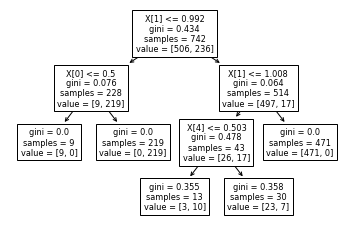

In [52]:
tree.plot_tree(tree_clf)

In [53]:
assert X_train.shape[1] <= 10

In [54]:
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
    
metrics.accuracy_score(y_test, y_pred)

0.75